In [37]:
#importing dependencies here
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# feature engineering
import re

# scikit
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB

In [38]:
# reading the dataset
personality_data = pd.read_csv("../data/mbti_1.csv")

In [39]:
# lookign at the top 5 rows of the dataset
personality_data.head()

,type,posts
0,INFJ,'http://www.youtube.com/watch?v=qsXHcwe3krw|||...
1,ENTP,'I'm finding the lack of me in these posts ver...
2,INTP,'Good one _____ https://www.youtube.com/wat...
3,INTJ,"'Dear INTP, I enjoyed our conversation the o..."
4,ENTJ,'You're fired.|||That's another silly misconce...


In [40]:
# checking the number of rows and columns
personality_data.shape

(8675, 2)

#### Each row as 50 posts. Splitting these posts into their own row.

In [41]:
# splitting rows - one row for each post
personality_data = pd.concat([pd.Series(row["type"], row["posts"].split("|||"))              
                                for _, row in personality_data.iterrows()]).reset_index().rename({"index": "posts", 0: "type"}, axis=1)

In [42]:
# checking the number of rows and columns again
personality_data.shape

(422845, 2)

Splitting of each row into 50 rows has added a lot more data to our dataset.

In [43]:
personality_data.head()

,posts,type
0,'http://www.youtube.com/watch?v=qsXHcwe3krw,INFJ
1,http://41.media.tumblr.com/tumblr_lfouy03PMA1q...,INFJ
2,enfp and intj moments https://www.youtube.com...,INFJ
3,What has been the most life-changing experienc...,INFJ
4,http://www.youtube.com/watch?v=vXZeYwwRDw8 h...,INFJ


#### Checking for Null values

In [44]:
# checking for missing values
personality_data.isnull().sum()

posts    0
type     0
dtype: int64

Luckily there are no missing values present in this dataset.

#### Checking for Class Imbalance

In [45]:
# checking number of records for each of the 16 personality types
personality_data["type"].value_counts()

INFP    89796
INFJ    72105
INTP    63359
INTJ    52471
ENTP    33761
ENFP    32769
ISTP    16498
ISFP    13000
ENTJ    11273
ISTJ     9913
ENFJ     9288
ISFJ     8121
ESTP     4337
ESFP     2215
ESFJ     2018
ESTJ     1921
Name: type, dtype: int64

The dataset seems to be Imbalanced.

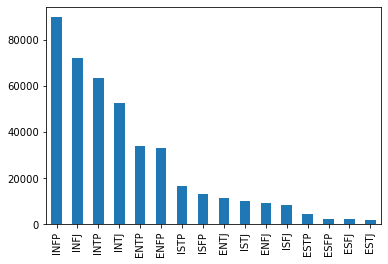

In [46]:
# visually showing the class imbalance
personality_data["type"].value_counts().plot(kind="bar")

In [47]:
# fixing the class imbalance but converting 16 classes into 4 more balanced classes
personality_data['is_Extrovert'] = personality_data['type'].apply(lambda x: 1 if x[0] == 'E' else 0)
personality_data['is_Sensing'] = personality_data['type'].apply(lambda x: 1 if x[1] == 'S' else 0)
personality_data['is_Thinking'] = personality_data['type'].apply(lambda x: 1 if x[2] == 'T' else 0)
personality_data['is_Judging'] = personality_data['type'].apply(lambda x: 1 if x[3] == 'J' else 0)
personality_data.head()

,posts,type,is_Extrovert,is_Sensing,is_Thinking,is_Judging
0,'http://www.youtube.com/watch?v=qsXHcwe3krw,INFJ,0,0,0,1
1,http://41.media.tumblr.com/tumblr_lfouy03PMA1q...,INFJ,0,0,0,1
2,enfp and intj moments https://www.youtube.com...,INFJ,0,0,0,1
3,What has been the most life-changing experienc...,INFJ,0,0,0,1
4,http://www.youtube.com/watch?v=vXZeYwwRDw8 h...,INFJ,0,0,0,1


In [48]:
# checking individual counts
introvert_count = personality_data["is_Extrovert"].value_counts()[0]
extrovert_count = personality_data["is_Extrovert"].value_counts()[1]

intuition_count = personality_data["is_Sensing"].value_counts()[0]
sensing_count = personality_data["is_Sensing"].value_counts()[1]

feeling_count = personality_data["is_Thinking"].value_counts()[0]
thinking_count = personality_data["is_Thinking"].value_counts()[1]

perceiving_count = personality_data["is_Judging"].value_counts()[0]
judging_count = personality_data["is_Judging"].value_counts()[1]

In [49]:
# printing all the counts
print(f"Introvert Count: {introvert_count}")
print(f"Extrovert Count: {extrovert_count}")
print(f"Intuition Count: {intuition_count}")
print(f"Sensing Count: {sensing_count}")
print(f"Feeling Count: {feeling_count}")
print(f"Thinking Count: {thinking_count}")
print(f"Perceiving Count: {perceiving_count}")
print(f"Judging Count: {judging_count}")

Introvert Count: 325263
Extrovert Count: 97582
Intuition Count: 364822
Sensing Count: 58023
Feeling Count: 229312
Thinking Count: 193533
Perceiving Count: 255735
Judging Count: 167110


The class imbalance issue still seem to exist but the data now looks much better than the minority class counts of previous data.

#### Checking for presence of correlations

In [50]:
corr = personality_data[["is_Extrovert", "is_Sensing", "is_Thinking", "is_Judging"]].corr()
corr.style.background_gradient(cmap='BrBG').set_precision(4)

,is_Extrovert,is_Sensing,is_Thinking,is_Judging
is_Extrovert,1.0000,-0.0473,0.0747,-0.1615
is_Sensing,-0.0473,1.0000,0.0843,-0.0135
is_Thinking,0.0747,0.0843,1.0000,-0.0088
is_Judging,-0.1615,-0.0135,-0.0088,1.0000


There does not seem to be any strong correlation between the four personality dimenions.

#### Feature Engineering

In [ ]:
# substituting urls with domain name
